# 1.0 Overview
Urbanization is when people move from rural places to cities. This is seen as a rise in the proportion of people who live in cities and towns.
Urbanization, however, affects various aspects of human society. These include socio-economic factors such as GDP, population growth rates, healthcare access, employment opportunities and development. In Kenya, urbanization has influenced the socio-economic factors aforementioned.

## 1.1 Research Questions
* What is the effect of urbanization on GDP Kenya?
* What is the trend of GDP with the increasing urbanization in Kenya?
* What does urbanization mean for development in Kenya?
* How has urbanization influenced healthcare access in Kenya?
* How has urbanization influenced unemployment in Kenya?

## 1.2 Objectives
* Determine the effect that urbanization has had on the GDP of Kenya.
* Find the trend of GDP with the increase in urbanization in Kenya.
* Determine what urbanization has done to development in Kenya.
* Determine the influence that urbanization has had on healthcare access in Kenya.
* Determine the influence of urbanization on unemployment in Kenya.

## 1.3 Data Description:
* `time` ~ the year of the data point.
* `agricultural_land_%_of_land_area`~ the proportion of land that is allocated for agriculture in Kenya.
* `agriculture_forestry_and_fishing_value_added_annual_%_growth` ~ the value added % change from agriculture, forestry and fishing.
* `access_to_electricity_urban_%_of_urban_population` ~ proportion of the urban population that have access to electricity as a percentage.
* `adults_ages_15-49_newly_infected_with_hiv` ~ newly reported cases of hiv
* `urban_population_%_of_total_population` ~ proportion of the population that live in urban areas
* `urban_population_growth_annual_%` ~ change in urban population from the previous year as a percentage.
* `urban_population` ~ urban population raw figure
* `rural_population` ~ rural population raw figure
* `rural_population_%_of_total_population` ~ proportion of the population that live in rural areas as a percentage.
* `rural_population_growth_annual_%` ~ % change in rural population from the previous year.
* `population_growth_annual_%` ~ % change in the total population from the previous year.
* `gdp_growth_annual_%` ~ % change in gdp from the previous year.
* `gdp_current_US$`~ the current value of the country's gdp in us dollars.

# 2.0 Data Understanding
The study will use open-source data in order to investigate the influence urbanization has had on the Kenyan society. The data to be used include data on gdp, healthcare, unemployment, urban and rural population.

In [2]:
# load dependencies
import pandas as pd
import numpy as np
import ee
import geemap
import folium
import geopandas as gpd
import geopy as gpy
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

In [3]:
ke_urban_target_path = 'src/data/ke_urbanareas/ke_urbanareas.shp'
ke_major_towns_path = 'src/data/ke_major-towns/ke_major-towns.shp'
base_dir = '/home/teofilo_acholla_ligawa_gafna/Documents/python_practice/collaborations/dte_datathon/'
ke_urban_file_path = base_dir+ke_urban_target_path

# read the urban and major towns files
ke_urban_shapefile = gpd.read_file(ke_urban_file_path)

ke_urban_shapefile

,URID,URNAME,geometry
0,UR,"Urban and associated areas, rural settlements","POLYGON ((36.71925 -1.31900, 36.71900 -1.31917..."
1,UR,"Urban and associated areas, rural settlements","POLYGON ((36.79016 -1.32067, 36.79011 -1.32072..."
2,UR,"Urban and associated areas, rural settlements","POLYGON ((36.67917 -1.33357, 36.67925 -1.33371..."
3,UR,"Urban and associated areas, rural settlements","POLYGON ((36.90098 -1.34641, 36.90098 -1.34760..."
4,UR,"Urban and associated areas, rural settlements","POLYGON ((36.70578 -1.36347, 36.70481 -1.36330..."
...,...,...,...
292,UR,"Urban and associated areas, rural settlements","POLYGON ((36.74226 -1.26365, 36.74298 -1.26377..."
293,UR,"Urban and associated areas, rural settlements","POLYGON ((36.87193 -1.27477, 36.87241 -1.27460..."
294,UR,"Urban and associated areas, rural settlements","POLYGON ((36.68344 -1.28486, 36.68357 -1.28469..."
295,UR,"Urban and associated areas, rural settlements","POLYGON ((36.91741 -1.28943, 36.91751 -1.28892..."


In [4]:
# plot urban areas in Kenya

# Create a Folium map centered on Kenya
m = folium.Map(location=[-1.2921, 36.8219], zoom_start=6)

# Define a style function to set the color
def style_function(feature):
    return {
        'fillColor': 'yellow',  # Change this color to your desired color
        'color': 'red',
        'weight': 2,
        'fillOpacity': 0.7,
    }

# Add the GeoJSON data to the map with the style_function
folium.GeoJson(
    ke_urban_shapefile,
    style_function=style_function,
).add_to(m)

# show map
m

The region of interest is Kenya and the map is centered around it. The blue marks indicate the urban areas of the country. From the map we realize that the urban areas in Kenya are not well spread out, they ar sparse towards the eastern, southern and northern part of the country. The urban areas in the country are mostly centrally located and a good number is seen towards the western part of the country.

In [5]:
# save the map
m.save(base_dir+'src/data/ke_urbanareas/kenyan_urbanareas_folium_map.html')

## 2.1 Preliminary Data Inspection
> In this phase of the study, we shall inspect the data about the data.

In [6]:
# load data
df1 = pd.read_csv(base_dir+'src/data/agriculture-electricity-health.csv')
df2 = pd.read_csv(base_dir+'src/data/gdp-population-rural.csv')
unemp =pd.read_csv(base_dir+'src/data/kenya-unemployment-rate.csv')

# preview
df1.head()

,time,agricultural_land_%_of_land_area,access_to_electricity_%_of_population,access_to_electricity_rural_%_of_rural_population,access_to_electricity_urban_%_of_urban_population,access_to_clean_fuels_and_technologies_for_cooking_urban_%_of_urban_population,access_to_clean_fuels_and_technologies_for_cooking_rural_%_of_rural_population,access_to_clean_fuels_and_technologies_for_cooking_%_of_population,adolescents_out_of_school_%_of_lower_secondary_school_age,adults_ages_15-49_newly_infected_with_hiv,agriculture_forestry_and_fishing_value_added_annual_%_growth,"hospital_beds_per_1,000_people",literacy_rate_adult_total_%_of_people_ages_15_and_above,"physicians_per_1,000_people"
0,1960,..,..,..,..,..,..,..,..,..,..,1.25048005580902,..,0.092
1,1961,44.2773307094915,..,..,..,..,..,..,..,..,..,..,..,..
2,1962,44.2861158941561,..,..,..,..,..,..,..,..,..,..,..,..
3,1963,44.2949010788207,..,..,..,..,..,..,..,..,..,..,..,..
4,1964,44.3036862634853,..,..,..,..,..,..,..,..,..,..,..,..


In [7]:
# preview df2
df2.head()

,time,forest_area_%_of_land_area,urban_population_%_of_total_population,urban_population_growth_annual_%,urban_population,urban_land_area_sq_km,rural_population,rural_population_%_of_total_population,rural_population_growth_annual_%,population_density_people_per_sq_km_of_land_area,population_growth_annual_%,unemployment_total_%_of_total_labor_force,gdp_growth_annual_%,gdp_current_US$,current_health_expenditure_%_of_gdp,domestic_general_government_health_expenditure_%_of_current_health_expenditure,domestic_general_government_health_expenditure_%_of_gdp,proportion_of_population_pushed_below_the_$2.15_$_2017_PPP_poverty_line_by_out_of_pocket_health_care_expenditure_%
0,1960,..,7.362,..,570661,..,7180774,92.638,..,..,..,..,..,7.912655e+08,..,..,..,..
1,1961,..,7.565,6.46796851804438,608791,..,7438679,92.435,3.52861026239367,14.1397020065362,3.74797688027386,..,-7.77463490371655,7.929595e+08,..,..,..,..
2,1962,..,7.774,6.57819145208457,650185,..,7713393,92.226,3.62648892733818,14.6951154373265,3.85285696473711,..,9.45735874072126,8.681114e+08,..,..,..,..
3,1963,..,8.038,7.25096775695646,699081,..,7998119,91.962,3.62482204432135,15.2813016129599,3.91148088133147,..,8.77834021621184,9.265893e+08,..,..,..,..
4,1964,..,8.318,7.37167699069845,752562,..,8294825,91.682,3.6425437339829,15.8965931053871,3.94748519609761,..,4.96446728844091,9.987593e+08,..,..,..,..


In [8]:
# preview unemployment
unemp.head()

,time,unemployment_rate_%,annual_unemp_change_%,
0,1991-12-31,3.276,NaN,NaN
1,1992-12-31,3.288,0.01,NaN
2,1993-12-31,3.256,-0.03,NaN
3,1994-12-31,3.210,-0.05,NaN
4,1995-12-31,3.171,-0.04,NaN


In [9]:
# metadata of df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 14 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   time                                                                            63 non-null     int64 
 1   agricultural_land_%_of_land_area                                                63 non-null     object
 2   access_to_electricity_%_of_population                                           63 non-null     object
 3   access_to_electricity_rural_%_of_rural_population                               63 non-null     object
 4   access_to_electricity_urban_%_of_urban_population                               63 non-null     object
 5   access_to_clean_fuels_and_technologies_for_cooking_urban_%_of_urban_population  63 non-null     object
 6   access_to_clean_fuels_and_te

In [10]:
# metadata of df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                              --------------  -----  
 0   time                                                                                                                63 non-null     int64  
 1   forest_area_%_of_land_area                                                                                          63 non-null     object 
 2   urban_population_%_of_total_population                                                                              63 non-null     float64
 3   urban_population_growth_annual_%                                                                                    63 non-null     object 
 4   urban_population      

In [11]:
# metadata for unemp
unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time                   32 non-null     object 
 1   unemployment_rate_%    32 non-null     float64
 2   annual_unemp_change_%  31 non-null     float64
 3                          0 non-null      float64
dtypes: float64(3), object(1)
memory usage: 1.1+ KB


In [12]:
# summary statistics of df1
df1.describe()

,time
count,63.000000
mean,1991.000000
std,18.330303
min,1960.000000
25%,1975.500000
50%,1991.000000
75%,2006.500000
max,2022.000000


In [13]:
# summary statistics of df2
df2.describe()

,time,urban_population_%_of_total_population,urban_population,rural_population,rural_population_%_of_total_population,gdp_current_US$
count,63.000000,63.000000,6.300000e+01,6.300000e+01,63.000000,6.300000e+01
mean,1991.000000,17.607460,5.470449e+06,2.089601e+07,82.392540,2.318447e+10
std,18.330303,6.077777,4.375918e+06,9.781360e+06,6.077777,3.129172e+10
min,1960.000000,7.362000,5.706610e+05,7.180774e+06,70.998000,7.912655e+08
25%,1975.500000,13.208500,1.833618e+06,1.204347e+07,77.767500,3.366944e+09
50%,1991.000000,17.043000,4.076385e+06,1.984185e+07,82.957000,8.209121e+09
75%,2006.500000,22.232500,8.334010e+06,2.914701e+07,86.791500,2.889185e+10
max,2022.000000,29.002000,1.566905e+07,3.835844e+07,92.638000,1.134200e+11


In [14]:
# check duplicates
print(df1.duplicated().sum())
print(df2.duplicated().sum())
print(unemp.duplicated().sum())


# missing values
print(f"df1 :\n {df1.isna().sum()}")
print()
print(f"df2 :\n {df2.isna().sum()}")
print()
print(f"unemp :\n {unemp.isna().sum()}")

0
0
0
df1 :
 time                                                                              0
agricultural_land_%_of_land_area                                                  0
access_to_electricity_%_of_population                                             0
access_to_electricity_rural_%_of_rural_population                                 0
access_to_electricity_urban_%_of_urban_population                                 0
access_to_clean_fuels_and_technologies_for_cooking_urban_%_of_urban_population    0
access_to_clean_fuels_and_technologies_for_cooking_rural_%_of_rural_population    0
access_to_clean_fuels_and_technologies_for_cooking_%_of_population                0
adolescents_out_of_school_%_of_lower_secondary_school_age                         0
adults_ages_15-49_newly_infected_with_hiv                                         0
agriculture_forestry_and_fishing_value_added_annual_%_growth                      0
hospital_beds_per_1,000_people                                 

### Observations:
* The data type of the values in the columns are not correct.
* The time variable should have be of date time category. The other variables should be of type float. This will be dealt with in the data preparation.
* There are missing values but they are not registered as missing values. This will be looked into and converted into missing values. The criteria will be attempting to convert the values into a float and if it does not get converted into a float then we register the value as missing.

# 3. Data Preparation
> In this phase of the study, we shall prepare the data for analysis.

## 3.1 Validity

In checking for the validity, we check if the data is in the correct format.

In [15]:
# Changing the format of the time variable

# Using the last date since each data point is an aggregation of a single year
df1['time'] = pd.to_datetime(df1['time'].astype(str) + '-12-31')
df2['time'] = pd.to_datetime(df2['time'].astype(str) + '-12-31')
unemp['time'] = pd.to_datetime(unemp['time'])

# preview
df1.head()

,time,agricultural_land_%_of_land_area,access_to_electricity_%_of_population,access_to_electricity_rural_%_of_rural_population,access_to_electricity_urban_%_of_urban_population,access_to_clean_fuels_and_technologies_for_cooking_urban_%_of_urban_population,access_to_clean_fuels_and_technologies_for_cooking_rural_%_of_rural_population,access_to_clean_fuels_and_technologies_for_cooking_%_of_population,adolescents_out_of_school_%_of_lower_secondary_school_age,adults_ages_15-49_newly_infected_with_hiv,agriculture_forestry_and_fishing_value_added_annual_%_growth,"hospital_beds_per_1,000_people",literacy_rate_adult_total_%_of_people_ages_15_and_above,"physicians_per_1,000_people"
0,1960-12-31,..,..,..,..,..,..,..,..,..,..,1.25048005580902,..,0.092
1,1961-12-31,44.2773307094915,..,..,..,..,..,..,..,..,..,..,..,..
2,1962-12-31,44.2861158941561,..,..,..,..,..,..,..,..,..,..,..,..
3,1963-12-31,44.2949010788207,..,..,..,..,..,..,..,..,..,..,..,..
4,1964-12-31,44.3036862634853,..,..,..,..,..,..,..,..,..,..,..,..


In [16]:
# preview unemp
unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   time                   32 non-null     datetime64[ns]
 1   unemployment_rate_%    32 non-null     float64       
 2   annual_unemp_change_%  31 non-null     float64       
 3                          0 non-null      float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.1 KB


## 3.2 Completeness

In this phase of the study, we shall sort out the missing values in the data. Having in mind that the data at first inspection- seemed not to have missing values because the values have been recorded as empty strings.

The approach would be to coerce the data into float, with those that do not get converted to float are registered as missing values.

In [17]:
# coercing to float
for df in [df1, df2]:
    for column in df.columns:
        if column != 'time':
            df[column] = pd.to_numeric(df[column], errors='coerce')

# preview
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 14 columns):
 #   Column                                                                          Non-Null Count  Dtype         
---  ------                                                                          --------------  -----         
 0   time                                                                            63 non-null     datetime64[ns]
 1   agricultural_land_%_of_land_area                                                61 non-null     float64       
 2   access_to_electricity_%_of_population                                           29 non-null     float64       
 3   access_to_electricity_rural_%_of_rural_population                               26 non-null     float64       
 4   access_to_electricity_urban_%_of_urban_population                               29 non-null     float64       
 5   access_to_clean_fuels_and_technologies_for_cooking_urban_%_of_urban_population  

In [18]:
# preview df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column                                                                                                              Non-Null Count  Dtype         
---  ------                                                                                                              --------------  -----         
 0   time                                                                                                                63 non-null     datetime64[ns]
 1   forest_area_%_of_land_area                                                                                          32 non-null     float64       
 2   urban_population_%_of_total_population                                                                              63 non-null     float64       
 3   urban_population_growth_annual_%                                                                                    62 non-null     

In [19]:
# missing values for df1
print(df1.isna().sum())

# Percentage of missing values per column
print()
print("Missing values percentage per column of df1:")
print(df1.isna().sum() / len(df1)* 100)

time                                                                               0
agricultural_land_%_of_land_area                                                   2
access_to_electricity_%_of_population                                             34
access_to_electricity_rural_%_of_rural_population                                 37
access_to_electricity_urban_%_of_urban_population                                 34
access_to_clean_fuels_and_technologies_for_cooking_urban_%_of_urban_population    41
access_to_clean_fuels_and_technologies_for_cooking_rural_%_of_rural_population    41
access_to_clean_fuels_and_technologies_for_cooking_%_of_population                41
adolescents_out_of_school_%_of_lower_secondary_school_age                         54
adults_ages_15-49_newly_infected_with_hiv                                         31
agriculture_forestry_and_fishing_value_added_annual_%_growth                       5
hospital_beds_per_1,000_people                                   

In [20]:
# missing values for df2
print(df2.isna().sum())

# Percentage of missing values per column
print()
print("Missing values percentage per column of df2:")
print(df2.isna().sum() / len(df2)* 100)

time                                                                                                                   0
forest_area_%_of_land_area                                                                                            31
urban_population_%_of_total_population                                                                                 0
urban_population_growth_annual_%                                                                                       1
urban_population                                                                                                       0
urban_land_area_sq_km                                                                                                 60
rural_population                                                                                                       0
rural_population_%_of_total_population                                                                                 0
rural_population_growth_annual_%

The study shall drop missing values based on the columns because a good number of the columns have missing values that are more than 50%.
The study has realized that for some of the columns the data starts from the early 90's onwards.

In [21]:
# dropping missing values by choosing columns with less than 54% missing values

# 54% because it marks the time around the early 90's when the data starts to become available

df1 = df1[['time', 'agricultural_land_%_of_land_area', 'access_to_electricity_%_of_population', 'adults_ages_15-49_newly_infected_with_hiv',
         'agriculture_forestry_and_fishing_value_added_annual_%_growth', 'access_to_electricity_urban_%_of_urban_population']]

df2 = df2[['time', 'urban_population_%_of_total_population', 'urban_population_growth_annual_%', 'urban_population',
         'rural_population', 'rural_population_%_of_total_population', 'rural_population_growth_annual_%',
         'population_growth_annual_%', 'gdp_growth_annual_%', 'gdp_current_US$']]

unemp = unemp[['time', 'unemployment_rate_%', 'annual_unemp_change_%']]

# Merge df1 and df2 on 'time' column
merged_df = pd.merge(df1, df2, on='time', how='left')

# Merge the result with 'unemp' DataFrame on 'time' column
df = pd.merge(merged_df, unemp, on='time', how='left')

# preview
df.head()

,time,agricultural_land_%_of_land_area,access_to_electricity_%_of_population,adults_ages_15-49_newly_infected_with_hiv,agriculture_forestry_and_fishing_value_added_annual_%_growth,access_to_electricity_urban_%_of_urban_population,urban_population_%_of_total_population,urban_population_growth_annual_%,urban_population,rural_population,rural_population_%_of_total_population,rural_population_growth_annual_%,population_growth_annual_%,gdp_growth_annual_%,gdp_current_US$,unemployment_rate_%,annual_unemp_change_%
0,1960-12-31,NaN,NaN,NaN,NaN,NaN,7.362,NaN,570661,7180774,92.638,NaN,NaN,NaN,7.912655e+08,NaN,NaN
1,1961-12-31,44.277331,NaN,NaN,NaN,NaN,7.565,6.467969,608791,7438679,92.435,3.528610,3.747977,-7.774635,7.929595e+08,NaN,NaN
2,1962-12-31,44.286116,NaN,NaN,NaN,NaN,7.774,6.578191,650185,7713393,92.226,3.626489,3.852857,9.457359,8.681114e+08,NaN,NaN
3,1963-12-31,44.294901,NaN,NaN,NaN,NaN,8.038,7.250968,699081,7998119,91.962,3.624822,3.911481,8.778340,9.265893e+08,NaN,NaN
4,1964-12-31,44.303686,NaN,NaN,NaN,NaN,8.318,7.371677,752562,8294825,91.682,3.642544,3.947485,4.964467,9.987593e+08,NaN,NaN


In [22]:
# preview tail
df.tail()

,time,agricultural_land_%_of_land_area,access_to_electricity_%_of_population,adults_ages_15-49_newly_infected_with_hiv,agriculture_forestry_and_fishing_value_added_annual_%_growth,access_to_electricity_urban_%_of_urban_population,urban_population_%_of_total_population,urban_population_growth_annual_%,urban_population,rural_population,rural_population_%_of_total_population,rural_population_growth_annual_%,population_growth_annual_%,gdp_growth_annual_%,gdp_current_US$,unemployment_rate_%,annual_unemp_change_%
58,2018-12-31,48.668166,61.180614,28000.0,5.724199,87.174843,27.030,3.779308,13502378,36450926,72.970,1.393422,2.032734,5.647946,9.220298e+10,4.245,0.73
59,2019-12-31,48.687493,69.700000,27000.0,2.697029,90.800000,27.507,3.727771,14015215,36936235,72.493,1.322618,1.978457,5.114159,1.003784e+11,5.010,0.77
60,2020-12-31,48.687493,71.492714,27000.0,4.622696,94.113396,27.995,3.768242,14553419,37432361,72.005,1.334255,2.009700,-0.272766,1.006575e+11,5.616,0.61
61,2021-12-31,48.687493,76.542450,28000.0,-0.353227,97.548004,28.493,3.706017,15102890,37902724,71.507,1.248739,1.942761,7.590489,1.097037e+11,5.644,0.03
62,2022-12-31,NaN,NaN,NaN,-1.639687,NaN,29.002,3.680144,15669052,38358435,70.998,1.195147,1.909510,4.846635,1.134200e+11,5.502,-0.14


In [23]:
# Using ffill to fill the missing values after 1990
filtered_df = df[df['time'] >= pd.to_datetime('1992-12-31')]

# Fill missing values in the filtered DataFrame using bfil
filtered_df.fillna(method='ffill', inplace=True)

# Merge the filled subset back into the original DataFrame
df.update(filtered_df)

df.head()

,time,agricultural_land_%_of_land_area,access_to_electricity_%_of_population,adults_ages_15-49_newly_infected_with_hiv,agriculture_forestry_and_fishing_value_added_annual_%_growth,access_to_electricity_urban_%_of_urban_population,urban_population_%_of_total_population,urban_population_growth_annual_%,urban_population,rural_population,rural_population_%_of_total_population,rural_population_growth_annual_%,population_growth_annual_%,gdp_growth_annual_%,gdp_current_US$,unemployment_rate_%,annual_unemp_change_%
0,1960-12-31,NaN,NaN,NaN,NaN,NaN,7.362,NaN,570661.0,7180774.0,92.638,NaN,NaN,NaN,7.912655e+08,NaN,NaN
1,1961-12-31,44.277331,NaN,NaN,NaN,NaN,7.565,6.467969,608791.0,7438679.0,92.435,3.528610,3.747977,-7.774635,7.929595e+08,NaN,NaN
2,1962-12-31,44.286116,NaN,NaN,NaN,NaN,7.774,6.578191,650185.0,7713393.0,92.226,3.626489,3.852857,9.457359,8.681114e+08,NaN,NaN
3,1963-12-31,44.294901,NaN,NaN,NaN,NaN,8.038,7.250968,699081.0,7998119.0,91.962,3.624822,3.911481,8.778340,9.265893e+08,NaN,NaN
4,1964-12-31,44.303686,NaN,NaN,NaN,NaN,8.318,7.371677,752562.0,8294825.0,91.682,3.642544,3.947485,4.964467,9.987593e+08,NaN,NaN


In [24]:
df.tail()

,time,agricultural_land_%_of_land_area,access_to_electricity_%_of_population,adults_ages_15-49_newly_infected_with_hiv,agriculture_forestry_and_fishing_value_added_annual_%_growth,access_to_electricity_urban_%_of_urban_population,urban_population_%_of_total_population,urban_population_growth_annual_%,urban_population,rural_population,rural_population_%_of_total_population,rural_population_growth_annual_%,population_growth_annual_%,gdp_growth_annual_%,gdp_current_US$,unemployment_rate_%,annual_unemp_change_%
58,2018-12-31,48.668166,61.180614,28000.0,5.724199,87.174843,27.030,3.779308,13502378.0,36450926.0,72.970,1.393422,2.032734,5.647946,9.220298e+10,4.245,0.73
59,2019-12-31,48.687493,69.700000,27000.0,2.697029,90.800000,27.507,3.727771,14015215.0,36936235.0,72.493,1.322618,1.978457,5.114159,1.003784e+11,5.010,0.77
60,2020-12-31,48.687493,71.492714,27000.0,4.622696,94.113396,27.995,3.768242,14553419.0,37432361.0,72.005,1.334255,2.009700,-0.272766,1.006575e+11,5.616,0.61
61,2021-12-31,48.687493,76.542450,28000.0,-0.353227,97.548004,28.493,3.706017,15102890.0,37902724.0,71.507,1.248739,1.942761,7.590489,1.097037e+11,5.644,0.03
62,2022-12-31,48.687493,76.542450,28000.0,-1.639687,97.548004,29.002,3.680144,15669052.0,38358435.0,70.998,1.195147,1.909510,4.846635,1.134200e+11,5.502,-0.14


In [25]:
# Check for missing values after merge
df.isna().sum() / len(df) * 100

time                                                             0.000000
agricultural_land_%_of_land_area                                 1.587302
access_to_electricity_%_of_population                           52.380952
adults_ages_15-49_newly_infected_with_hiv                       47.619048
agriculture_forestry_and_fishing_value_added_annual_%_growth     7.936508
access_to_electricity_urban_%_of_urban_population               52.380952
urban_population_%_of_total_population                           0.000000
urban_population_growth_annual_%                                 1.587302
urban_population                                                 0.000000
rural_population                                                 0.000000
rural_population_%_of_total_population                           0.000000
rural_population_growth_annual_%                                 1.587302
population_growth_annual_%                                       1.587302
gdp_growth_annual_%                   

# 4.0 Exploratory Data Analysis
> In this phase, the study shall perform univariate and bivariate analysis to unfold patterns and trends within the data

In [30]:
# #### Univariate

# What are the trends in access to electricity in urban and rural areas
# Trends in unemployment,
# Changes in the percentage of agricultural land as a proportion of total land area in urban and rural areas over time - this is not possible
# our data does not group areas as either urban or rural - is there like a way of doing it?

# #### Bivariate

# How has urbanization influenced the percentage of agricultural land as a proportion of total land area in urban and rural areas over time? - how do we do this?
# this is what I asked
# How has urbanization influenced access to electricity in urban and rural areas -how do we find this out?

# Has urbanization led to improvements in access to clean fuels and technologies for cooking in urban and rural populations, 
# and are there variations in this improvement based on the level of urbanization - again, how?

# What impact does urbanization have on the educational opportunities for adolescents, 
# and are there disparities in school attendance between urban and rural areas? - nulllified. No data for this

# Does urbanization lead to changes in the structure of the economy, 
# such as a shift away from agriculture, forestry, and fishing toward more urban-centric industries? - interesting but how?

# Does urbanization impact the incidence of HIV infections among adults (ages 15-49), 
# and are there differences in infection rates between urban and rural populations? - l like the first part, the second part not possible because of the nature of
# our data but it would have been good if we could find that out.

## 4.1 Univariate Data Analysis
> Analyzing one variable at a time

### 4.1.1 Column Distribution

Inspecting the distribution of the various numeric variables.

<Figure size 1500x3000 with 0 Axes>

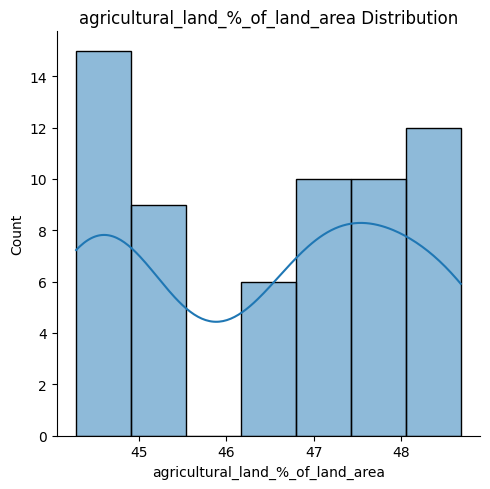

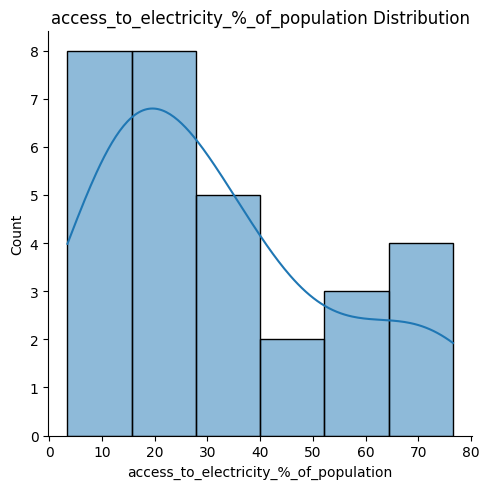

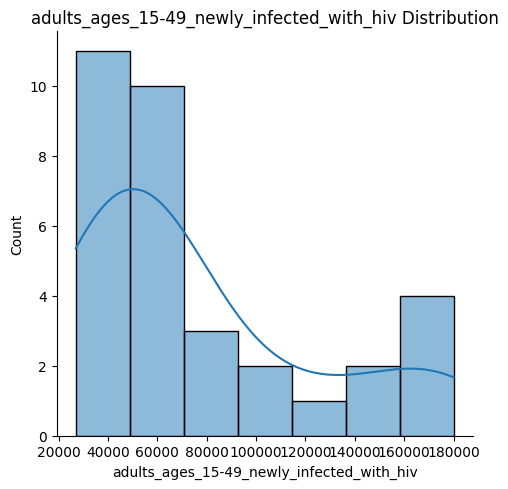

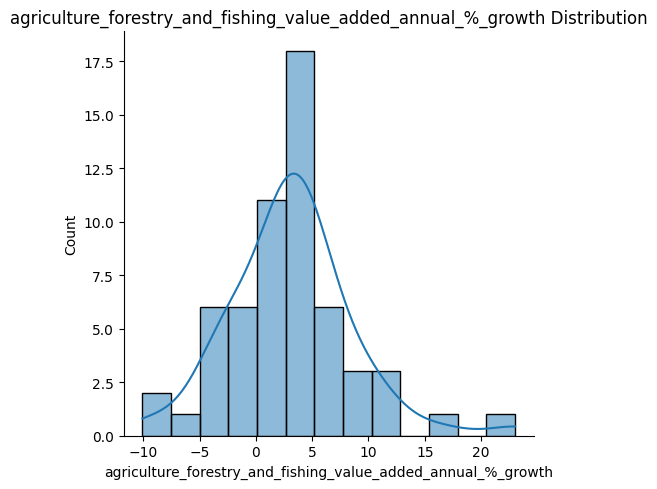

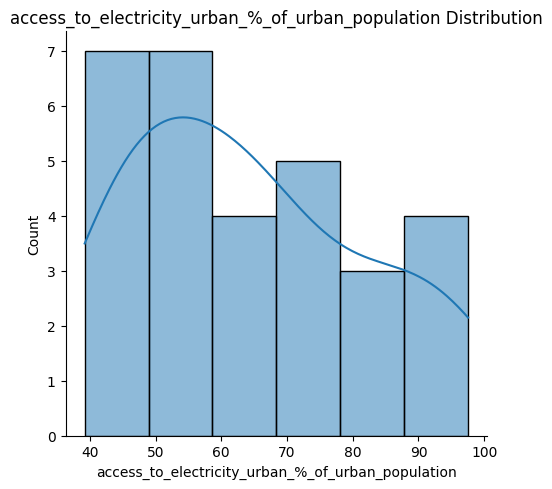

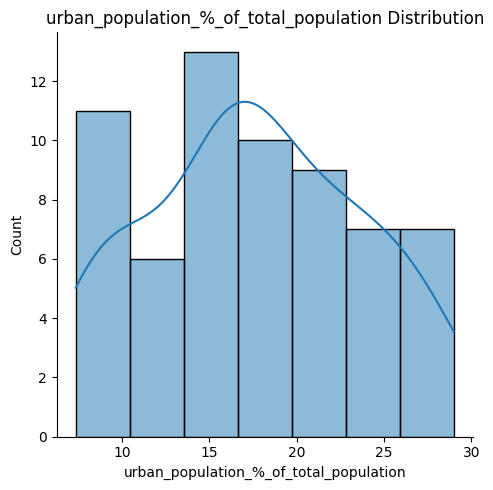

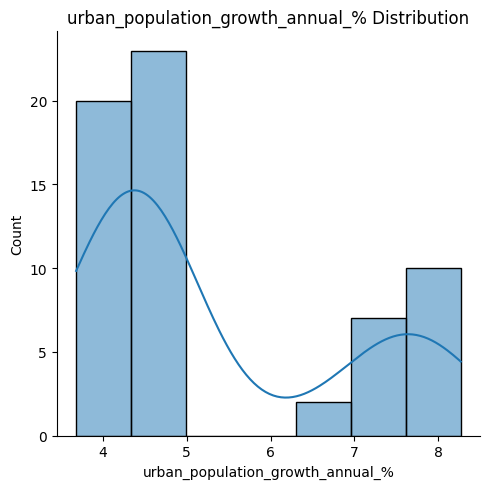

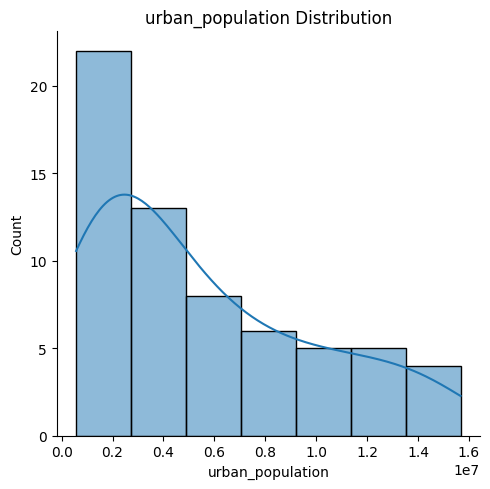

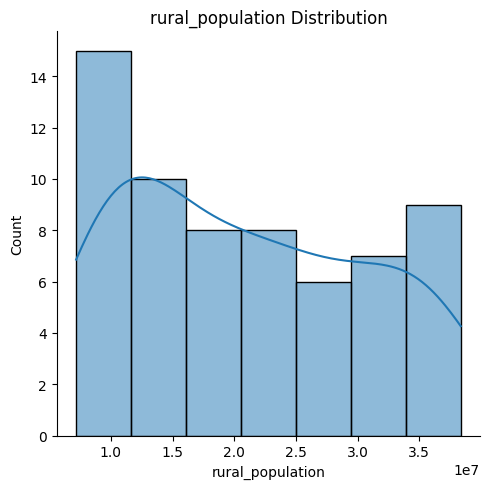

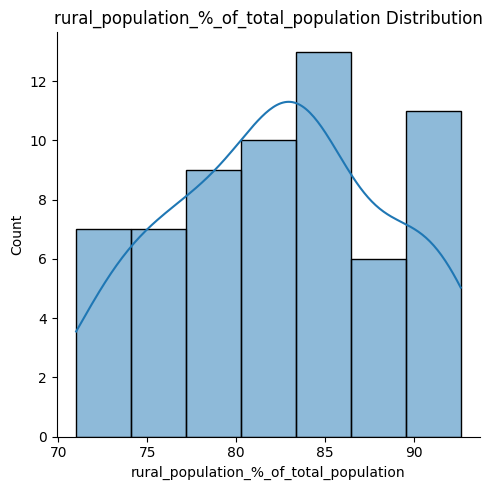

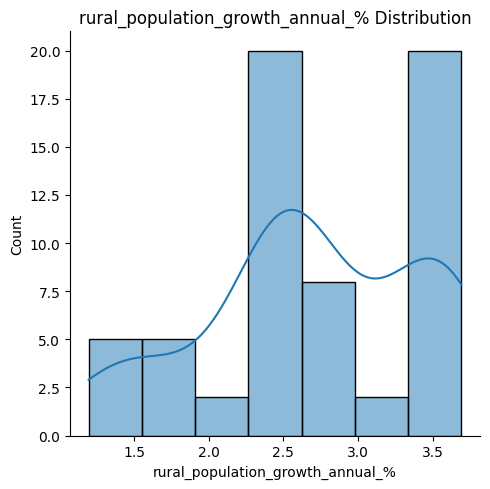

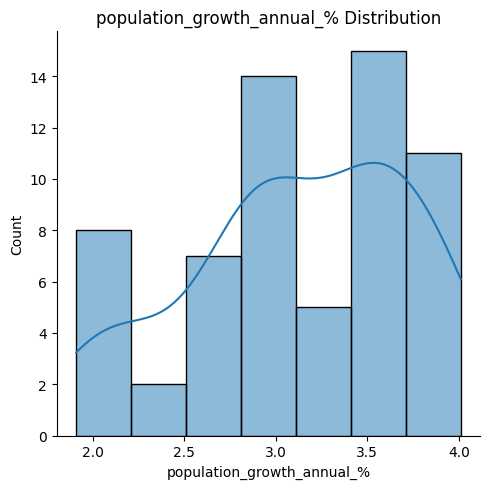

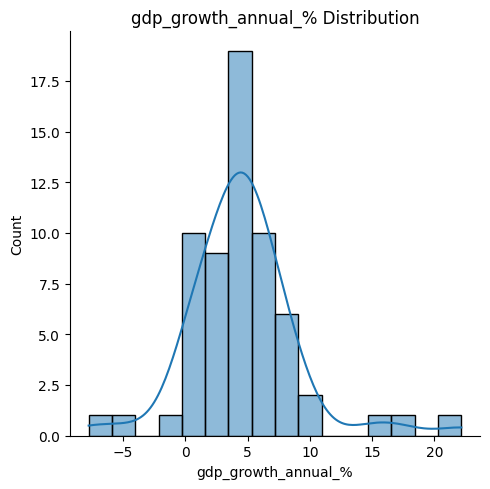

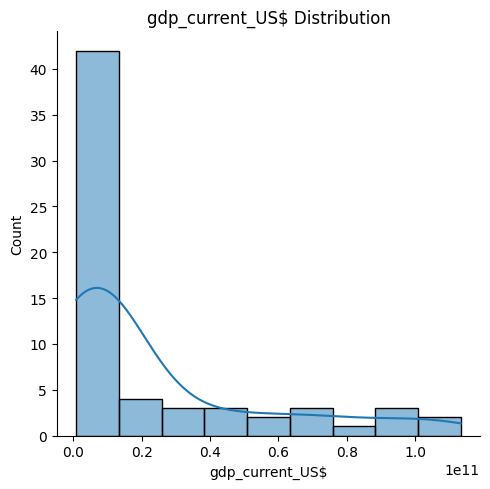

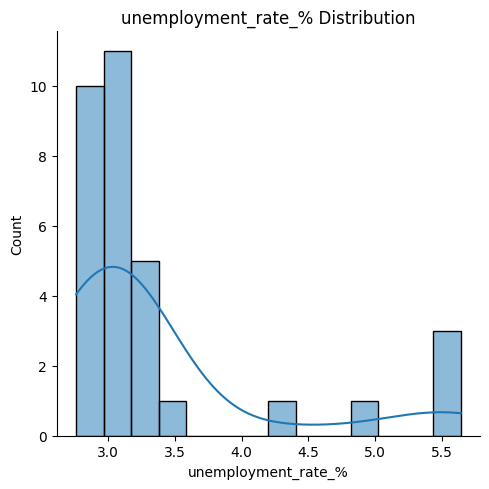

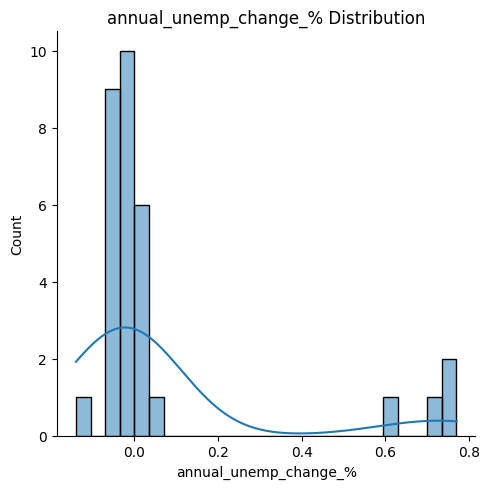

In [26]:
numeric_cols = df.select_dtypes(include=['int', 'float'])

# plotting the distribution of numeric columns
plt.figure(figsize=(15,30))
for idx, col in enumerate(numeric_cols):
    sns.displot(data=df, x=col, kde=True)
    plt.title(f"{col} Distribution")
    plt.tight_layout()

### Observations
Most of the variables do not exhibit a uniform distribution. The variables that show a normal distribution are:
* `gdp_growth_annual_%`
* `agriculture_forestry_and_fishing_value_added_annual_%_growth`

The rest of the variables do not show a uniform distribution.

In [27]:
# summary statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
agricultural_land_%_of_land_area,62.0,4.645818e+01,1.636206e+00,4.427733e+01,4.493358e+01,4.685403e+01,4.776461e+01,4.868749e+01
access_to_electricity_%_of_population,30.0,3.207086e+01,2.209419e+01,3.473437e+00,1.538177e+01,2.547228e+01,4.122304e+01,7.654245e+01
adults_ages_15-49_newly_infected_with_hiv,33.0,7.603030e+04,4.863865e+04,2.700000e+04,4.000000e+04,5.900000e+04,9.400000e+04,1.800000e+05
agriculture_forestry_and_fishing_value_added_annual_%_growth,58.0,3.156977e+00,5.477254e+00,-1.007319e+01,3.441316e-03,2.900452e+00,5.048577e+00,2.302879e+01
access_to_electricity_urban_%_of_urban_population,30.0,6.436233e+01,1.794095e+01,3.922034e+01,4.995505e+01,6.112527e+01,7.681404e+01,9.754800e+01
urban_population_%_of_total_population,63.0,1.760746e+01,6.077777e+00,7.362000e+00,1.320850e+01,1.704300e+01,2.223250e+01,2.900200e+01
urban_population_growth_annual_%,62.0,5.342980e+00,1.546289e+00,3.680144e+00,4.265542e+00,4.656071e+00,7.278262e+00,8.270608e+00
urban_population,63.0,5.470449e+06,4.375918e+06,5.706610e+05,1.833618e+06,4.076385e+06,8.334010e+06,1.566905e+07
rural_population,63.0,2.089601e+07,9.781360e+06,7.180774e+06,1.204347e+07,1.984185e+07,2.914701e+07,3.835844e+07
rural_population_%_of_total_population,63.0,8.239254e+01,6.077777e+00,7.099800e+01,7.776750e+01,8.295700e+01,8.679150e+01,9.263800e+01


#### Observations:
* Throughout the study period, averagely 46.45 % of land in Kenya is being used for agriculture.
* The mean change in population growth is 3.13 %.
* During the study period, only 32 % of the population have managed to access electricity. This figure is lowered by the fact that in the earlier years of Kenya's independence a very small percentage of the population had access to electricity.
* During the study period, the standard deviation of the proportion of the population that is urban population is at 6.077 with the maximum value at 29.00 % and the minimum value at 7.36 %. This shows that the data is moderately tightly clustered around the mean.
* The proportion of the population that is rural has a standard deviation of 6.077, which is similar to that of the proportion of the population that is urban. Its maximum value is 92.63 % with the minimum being at 82.39 %.

## 4.2 How do these variables vary over time?
> Inspect the trend of the data over time.

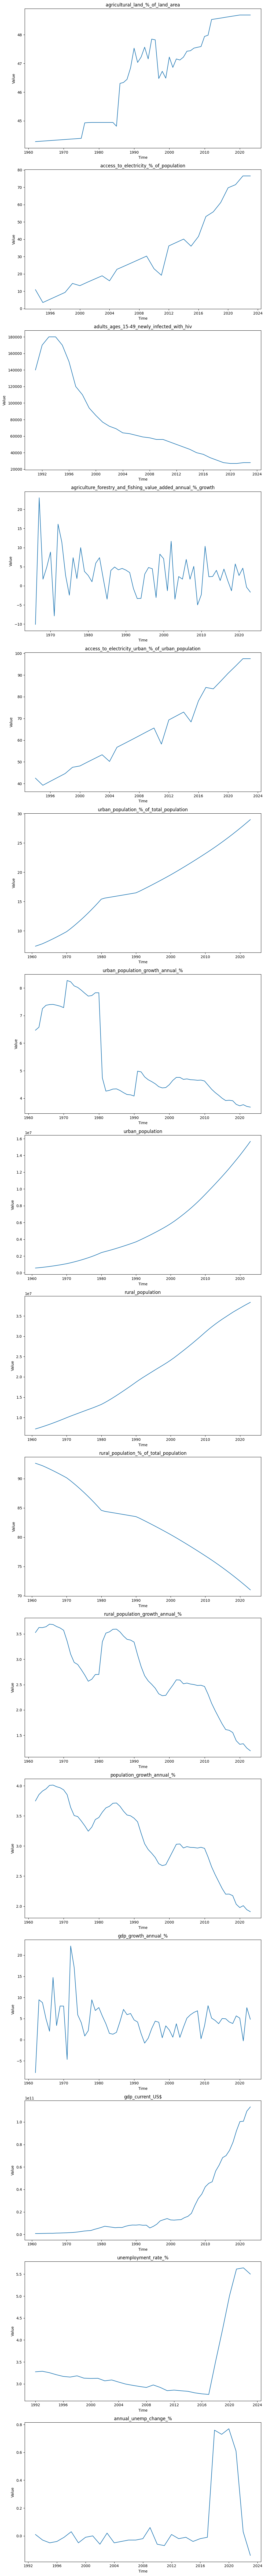

In [28]:
# Create subplots for each variable
variables_to_plot = df.columns[1:]  # Exclude 'time'
num_variables = len(variables_to_plot)

fig, axes = plt.subplots(nrows=num_variables, ncols=1, figsize=(10, 6*num_variables))

for i, variable in enumerate(variables_to_plot):
    ax = axes[i]
    ax.plot(df['time'], df[variable])
    ax.set_title(variable)
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Observations during the study period in Kenya:
* `agricultural_land_%_of_land_area`, `access_to_electricity_urban_%_of_urban_population`, `urban_population_%_of_total_population`, `urban_population`, `rural_population`, `rural_population_%_of_total_population` `gdp_current_US$` and `access_to_electricity_%_of_population` have a rising trend.
* `agriculture_forestry_and_fishing_value_added_annual_%_growth` fluctuates over the years.
* `urban_population_growth_annual_%` and `rural_population_growth_annual_%` show a declining trend. This makes sense because even `population_growth_annual_%` exhibits a declining trend.

## 4.3 Correlation of numeric variables with `urban_population_growth_annual_%`

Plotting each variable against urban population growth. Correlation here does not imply that a change in one variable causes a change in another variable. Instead, correlation implies that changes in one variable are associated with changes in the other variable.

In [29]:
# Removing the missing values because they could influence the test
df_0 = df.dropna(axis=0)

# preview
df_0

,time,agricultural_land_%_of_land_area,access_to_electricity_%_of_population,adults_ages_15-49_newly_infected_with_hiv,agriculture_forestry_and_fishing_value_added_annual_%_growth,access_to_electricity_urban_%_of_urban_population,urban_population_%_of_total_population,urban_population_growth_annual_%,urban_population,rural_population,rural_population_%_of_total_population,rural_population_growth_annual_%,population_growth_annual_%,gdp_growth_annual_%,gdp_current_US$,unemployment_rate_%,annual_unemp_change_%
33,1993-12-31,47.158871,10.900000,180000.0,-3.271955,42.500000,17.645,4.673960,4480388.0,20911442.0,82.355,2.574598,2.941842,0.353197,5.751787e+09,3.256,-0.03
34,1994-12-31,47.847630,3.473437,170000.0,3.077415,39.220341,17.952,4.604911,4691530.0,21442214.0,82.048,2.506512,2.879988,2.632785,7.148149e+09,3.210,-0.05
35,1995-12-31,47.823031,5.427343,150000.0,4.792358,41.030964,18.263,4.526933,4908793.0,21969554.0,81.737,2.429599,2.809367,4.406217,9.046320e+09,3.171,-0.04
36,1996-12-31,46.475384,7.378531,120000.0,4.471222,42.828949,18.579,4.421947,5130728.0,22485008.0,81.421,2.319119,2.706474,4.146839,1.204587e+10,3.156,-0.01
37,1997-12-31,46.726640,9.326318,110000.0,-3.065181,44.611137,18.898,4.376847,5360279.0,23003985.0,81.102,2.281869,2.674429,0.474902,1.311576e+10,3.184,0.03
38,1998-12-31,46.487683,14.500000,94000.0,8.289503,47.500000,19.222,4.389092,5600786.0,23536587.0,80.778,2.288864,2.689160,3.290214,1.409400e+10,3.131,-0.05
39,1999-12-31,47.222125,13.208892,85000.0,7.092375,48.117168,19.550,4.493254,5858183.0,24106946.0,80.450,2.394391,2.801269,2.305389,1.289601e+10,3.125,-0.01
40,2000-12-31,46.861932,15.175694,77000.0,-1.277202,49.873398,19.892,4.649670,6137001.0,24714605.0,80.108,2.489435,2.915447,0.599695,1.270535e+10,3.128,0.00
41,2001-12-31,47.157114,17.048136,72000.0,11.658067,51.581501,20.239,4.758207,6436071.0,25364272.0,79.761,2.594721,3.028827,3.779906,1.298601e+10,3.070,-0.06
42,2002-12-31,47.120216,18.912029,69000.0,-3.496361,53.287533,20.591,4.757876,6749693.0,26030130.0,79.409,2.591314,3.033610,0.546860,1.314774e+10,3.090,0.02


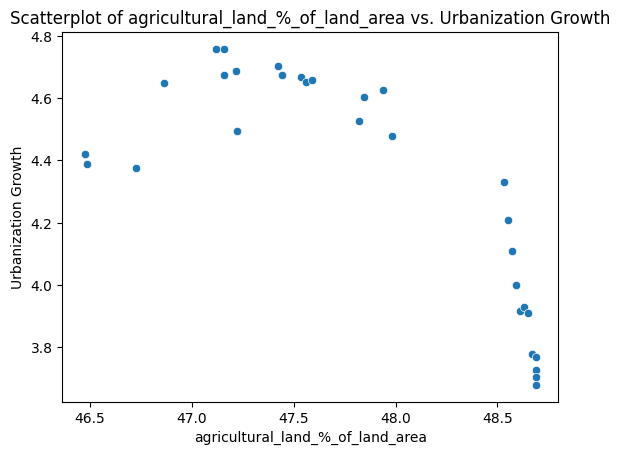

Correlation coefficient between urban population growth and agricultural_land_%_of_land_area: -0.771
There is very strong negative correlation between the urban population growth and agricultural_land_%_of_land_area
This means that an increase in urban population growth is associated with are very strong decrease in agricultural_land_%_of_land_area




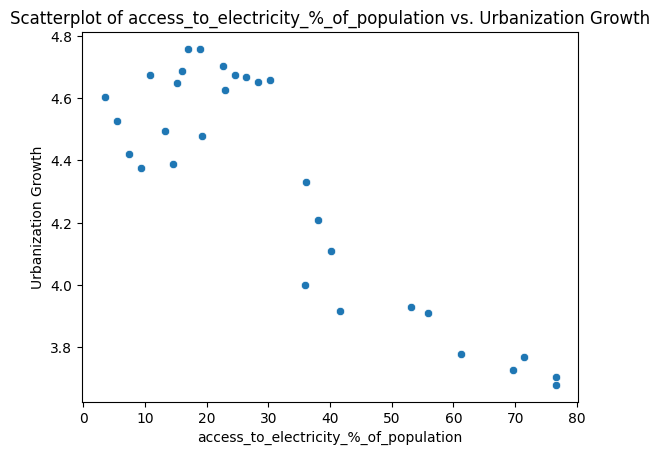

Correlation coefficient between urban population growth and access_to_electricity_%_of_population: -0.875
There is very strong negative correlation between the urban population growth and access_to_electricity_%_of_population
This means that an increase in urban population growth is associated with are very strong decrease in access_to_electricity_%_of_population




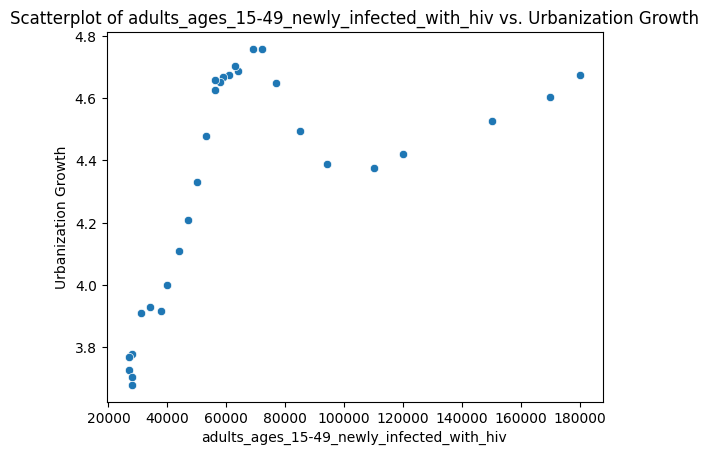

Correlation coefficient between urban population growth and adults_ages_15-49_newly_infected_with_hiv: 0.573
There is a moderately strong positive correlation between urban population growth and adults_ages_15-49_newly_infected_with_hiv.
This means that an increase in urban population growth is associated with an strong and modelrately increase in adults_ages_15-49_newly_infected_with_hiv 




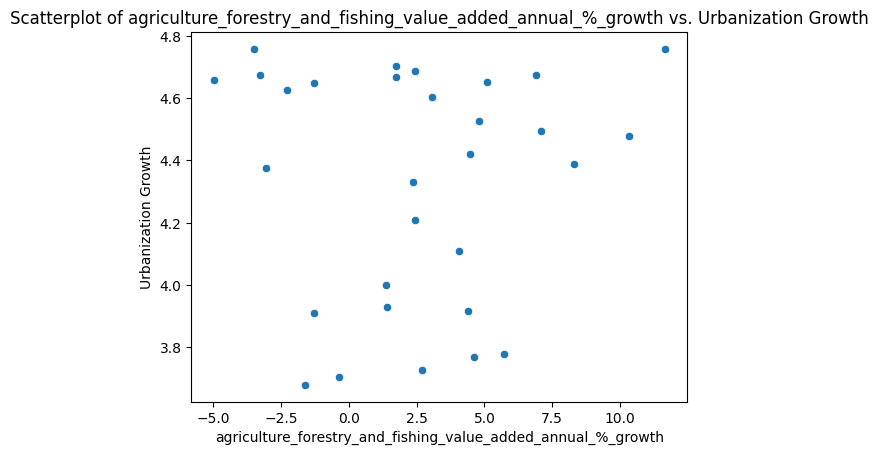

Correlation coefficient between urban population growth and agriculture_forestry_and_fishing_value_added_annual_%_growth: 0.034
There is a weak positive correlation between the variables.
This means that an increase in urban population growth is associated with a weak but positive increase in agriculture_forestry_and_fishing_value_added_annual_%_growth




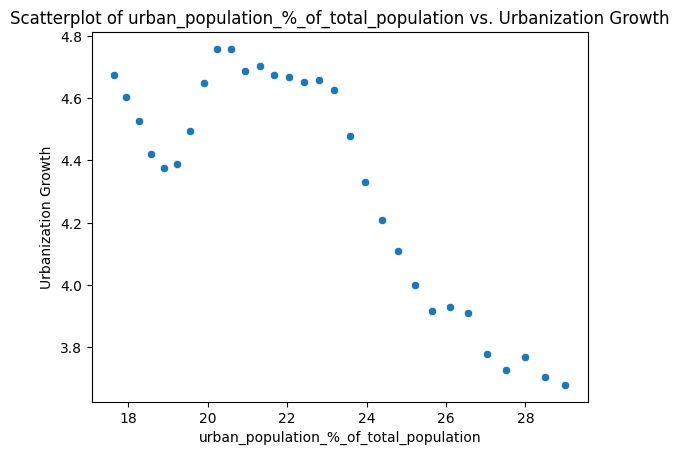

Correlation coefficient between urban population growth and urban_population_%_of_total_population: -0.843
There is very strong negative correlation between the urban population growth and urban_population_%_of_total_population
This means that an increase in urban population growth is associated with are very strong decrease in urban_population_%_of_total_population




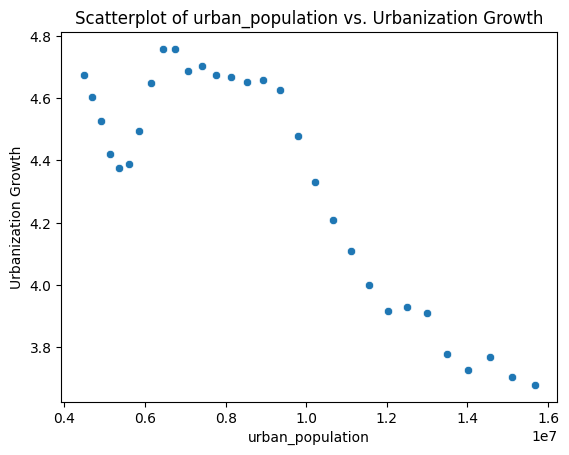

Correlation coefficient between urban population growth and urban_population: -0.867
There is very strong negative correlation between the urban population growth and urban_population
This means that an increase in urban population growth is associated with are very strong decrease in urban_population




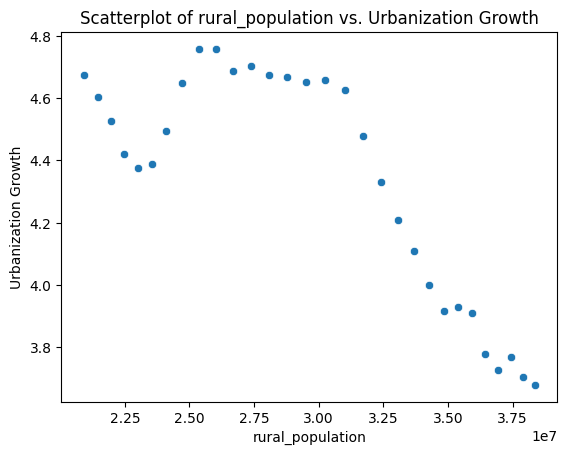

Correlation coefficient between urban population growth and rural_population: -0.812
There is very strong negative correlation between the urban population growth and rural_population
This means that an increase in urban population growth is associated with are very strong decrease in rural_population




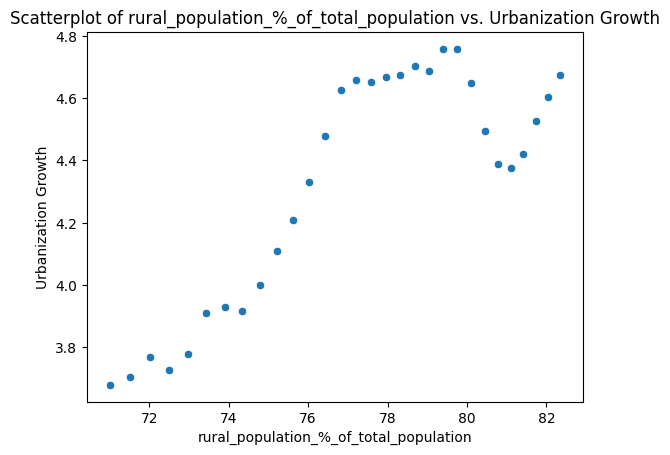

Correlation coefficient between urban population growth and rural_population_%_of_total_population: 0.843
There is a very strong positive correlation between urban population growth and rural_population_%_of_total_population
This means that an increase in urban population growth is associated with a very strong and positive increase in rural_population_%_of_total_population 




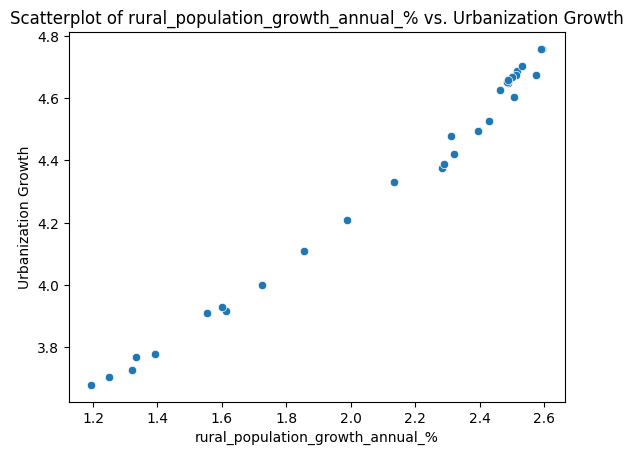

Correlation coefficient between urban population growth and rural_population_growth_annual_%: 0.994
There is a very strong positive correlation between urban population growth and rural_population_growth_annual_%
This means that an increase in urban population growth is associated with a very strong and positive increase in rural_population_growth_annual_% 




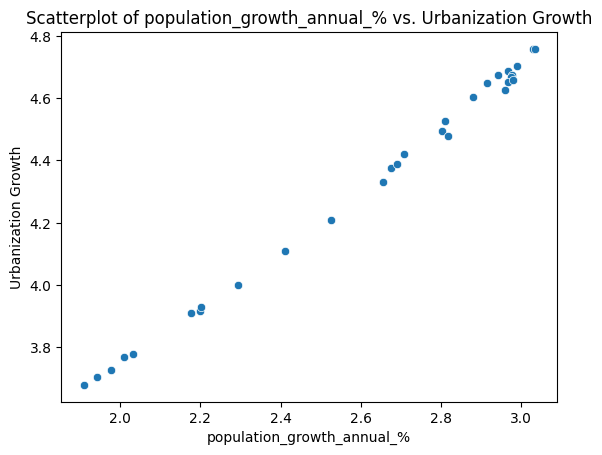

Correlation coefficient between urban population growth and population_growth_annual_%: 0.998
There is a very strong positive correlation between urban population growth and population_growth_annual_%
This means that an increase in urban population growth is associated with a very strong and positive increase in population_growth_annual_% 




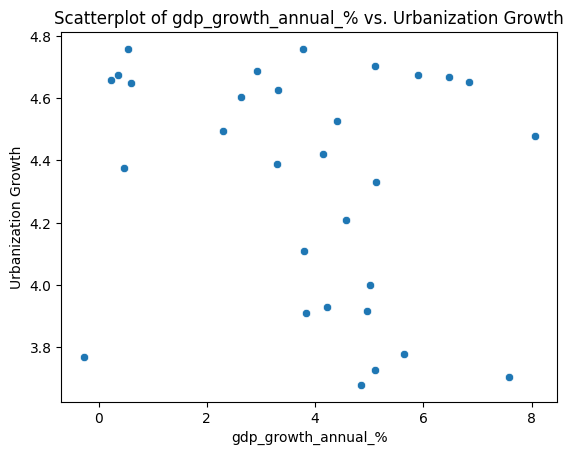

Correlation coefficient between urban population growth and gdp_growth_annual_%: -0.241
There is a weak negative correlation coefficient between the variables
This means that an increase in urban population growth is associated weak decrease in gdp_growth_annual_%




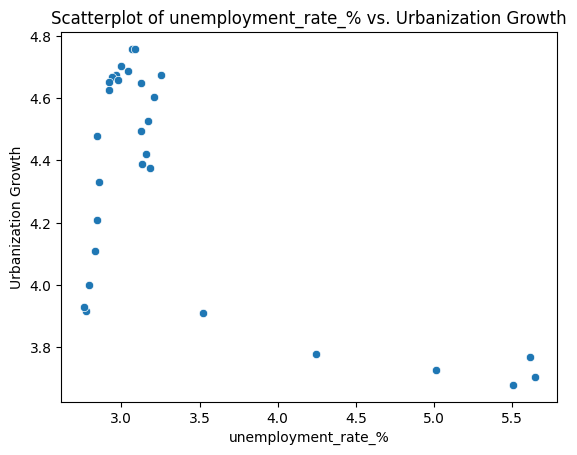

Correlation coefficient between urban population growth and unemployment_rate_%: -0.667
There is a moderately strong negative correlation between the variables
This means that an increase in urban population growth is associated with a moderately strong decrease in unemployment_rate_%




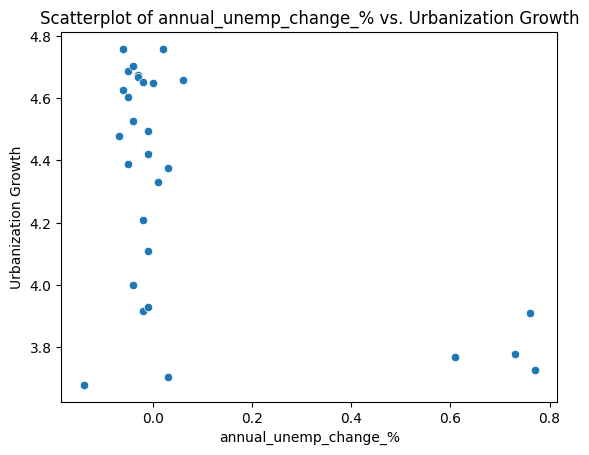

Correlation coefficient between urban population growth and annual_unemp_change_%: -0.548
There is a moderately strong negative correlation between the variables
This means that an increase in urban population growth is associated with a moderately strong decrease in annual_unemp_change_%




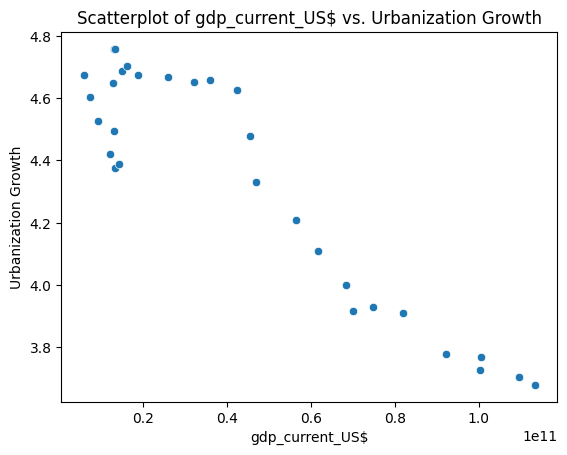

Correlation coefficient between urban population growth and gdp_current_US$: -0.927
There is very strong negative correlation between the urban population growth and gdp_current_US$
This means that an increase in urban population growth is associated with are very strong decrease in gdp_current_US$




In [30]:
# Select numeric variables and exclude 'urban_population_growth_annual_%'
numeric_vars = [
    'agricultural_land_%_of_land_area',
    'access_to_electricity_%_of_population',
    'adults_ages_15-49_newly_infected_with_hiv',
    'agriculture_forestry_and_fishing_value_added_annual_%_growth',
    'urban_population_%_of_total_population',
    'urban_population',
    'rural_population',
    'rural_population_%_of_total_population',
    'rural_population_growth_annual_%',
    'population_growth_annual_%',
    'gdp_growth_annual_%',
    'unemployment_rate_%',
    'annual_unemp_change_%',
    'gdp_current_US$'
]

# Calculate correlation coefficients and plot scatterplots
for var in numeric_vars:
    correlation_coefficient = df_0['urban_population_growth_annual_%'].corr(df[var])
    
    # Create scatterplot
    sns.scatterplot(data=df_0, x=var, y='urban_population_growth_annual_%')
    
    # Set title and labels
    plt.title(f'Scatterplot of {var} vs. Urbanization Growth')
    plt.xlabel(var)
    plt.ylabel('Urbanization Growth')
    
    # Show the plot
    plt.show()

    # Calculate correlation coefficient
    
    print(f"Correlation coefficient between urban population growth and {var}: {correlation_coefficient:.3f}")
    if correlation_coefficient > 0.5 and correlation_coefficient < 0.75:
        print(f"There is a moderately strong positive correlation between urban population growth and {var}.")
        print(f"This means that an increase in urban population growth is associated with an strong and modelrately increase in {var} ")

    elif correlation_coefficient > 0.75 and correlation_coefficient < 1.0:
        print(f"There is a very strong positive correlation between urban population growth and {var}")
        print(f"This means that an increase in urban population growth is associated with a very strong and positive increase in {var} ")
        
    elif correlation_coefficient > 0 and correlation_coefficient < 0.5:
        print(f"There is a weak positive correlation between the variables.")
        print(f"This means that an increase in urban population growth is associated with a weak but positive increase in {var}")

    elif correlation_coefficient < 0 and correlation_coefficient > -0.5:
        print(f"There is a weak negative correlation coefficient between the variables")
        print(f"This means that an increase in urban population growth is associated weak decrease in {var}")

    elif correlation_coefficient < -0.5 and correlation_coefficient > -0.75:
        print(f"There is a moderately strong negative correlation between the variables")
        print(f"This means that an increase in urban population growth is associated with a moderately strong decrease in {var}")

    elif correlation_coefficient > -1 and correlation_coefficient < -0.75:
        print(f"There is very strong negative correlation between the urban population growth and {var}")
        print(f"This means that an increase in urban population growth is associated with are very strong decrease in {var}")
        
    print("=" * 100)
    print("\n")

## 4.4 Causality tests

In this phase, the study performs granger causality tests to help us understand whether one thing can predict or cause another thing to happen in a time series.
Granger causality doesn't imply a cause-and-effect relationship in the real world; it only suggests that there's some predictive power from one variable to another within the context of the data. It's a tool used in time series analysis to explore potential relationships between variables over time.

In simpler terms, knowing past values of a variable helps us make a better prediction about future values of another variable. Say urban population growth % helping us predict better the future values of unemployment rate.

It uses a concept of lags which are basically delays:
* **Lag 1** *(1-Year Lag)*: This means a 1-year delay. It implies that you're investigating whether the values of one variable at the current year influence the values of another variable in the following year.

* **Lag 2** *(2-Year Lag)*: This implies a two-year delay.You're assessing whether the values of one variable at the current year influence the values of another variable two years later.

* **Lag 3** (*3-Year Lag)*: A three-year lag means you're looking for causality with a three-year delay.


In [31]:
# Perform Granger Causality Tests
max_lag = 2

for var in numeric_vars:
    print(f"Granger Causality Test Results for urban population growth % causing {var}:\n")

    # define null and alternative hypothesis
    h0 = f"There is no granger causal relationship between urban population growth % and {var}"
    h1 = f"There is a granger causal relationship between urban population growth % and {var}"
    
    print(f"Null hypothesis: {h0}\nAlternative hypothesis:{h1} \n")
    
    for lag in range(1, max_lag + 1):
        test_data = df_0[['urban_population_growth_annual_%', var]].shift(lag).dropna()
        granger_test_result = grangercausalitytests(test_data, lag, verbose=False)
        p_value = granger_test_result[lag][0]['ssr_ftest'][1]
        
        significance_level = 0.05
        
        if p_value < significance_level:
            conclusion = f"reject the null hypothesis. We have enough evidence to conclude that urban population growth % granger causes {var}"
        else:
            conclusion = f"fail to reject the null hypothesis. We do not have enough evidence to conclude that urban population growth % Granger-causes {var}."
            
        print(f"Lag {lag}: p-value for urban population growth % and {var} = {p_value:.4f} - {conclusion}")

    print("="*100)

Granger Causality Test Results for urban population growth % causing agricultural_land_%_of_land_area:

Null hypothesis: There is no granger causal relationship between urban population growth % and agricultural_land_%_of_land_area
Alternative hypothesis:There is a granger causal relationship between urban population growth % and agricultural_land_%_of_land_area 

Lag 1: p-value for urban population growth % and agricultural_land_%_of_land_area = 0.0008 - reject the null hypothesis. We have enough evidence to conclude that urban population growth % granger causes agricultural_land_%_of_land_area
Lag 2: p-value for urban population growth % and agricultural_land_%_of_land_area = 0.0039 - reject the null hypothesis. We have enough evidence to conclude that urban population growth % granger causes agricultural_land_%_of_land_area
Granger Causality Test Results for urban population growth % causing access_to_electricity_%_of_population:

Null hypothesis: There is no granger causal relation

In [39]:
# # save the data without missing values
# df_0.to_csv(base_dir+'src/data/challenge_1_cleaned.csv')

## Conclusion:
* The association between urban population growth % and agricultural land % of land area exhibits a behavior such that if urban population growth % increases the proportion of land in the country that is allocated for agriculture reduces. But this is not very bad because the value added from agriculture and fishing, though weak is positive.
* An increase in urban population growth % is associated with an increase in adult ages 15-49 newly infected with hiv. This suggests that as urbanization increases, the new cases of hiv also increase.
* We also found that an increase in urban population growth % is associated with an decrease in unemployment rate. This suggests that amidst the rising annual growth in urbanization, unemployment rate decreases over the years. Urbanization creates jobs for the population.
* The impact of urban population growth % is influences agricultural land % of land area for at least 2 years.
* The impact of urban population growth % influences unemployment after 2 years as shown by the granger causality test. For example, the increase in urban population growth % in 2021 is felt by unemployment rate in 2023.
* The impact of urban population growth % influences gdp current after 1 year as shown by the granger causality test.
*  Over the years `agricultural_land_%_of_land_area`, `access_to_electricity_urban_%_of_urban_population`, `urban_population_%_of_total_population`, `urban_population`, `rural_population`, `rural_population_%_of_total_population` `gdp_current_US$` and `access_to_electricity_%_of_population` show an increase in value.
* `agriculture_forestry_and_fishing_value_added_annual_%_growth` fluctuates over the years.
* `urban_population_growth_annual_%` and `rural_population_growth_annual_%` show a declining trend. This makes sense because even `population_growth_annual_%` exhibits a declining trend. The population itself is growing but the annual change is declining.

## Recommendations:
The main stakeholder is the government of Kenya. The study recommends the following to the stakeholder:
1. The government should invest in data collection and analysis to monitor urbanization trends and their impacts. Data-driven decision-making will enable the government to adapt policies and strategies as needed.
2. As urbanization is associated with a decrease in unemployment rates, the government should continue to invest in policies and programs that promote job creation in urban areas. This could include initiatives to support entrepreneurship, vocational training, and attracting industries that can provide employment opportunities.
3. To address the increase in adult ages 15-49 newly infected with HIV associated with urbanization, the government should prioritize HIV prevention and healthcare services in urban areas. Public awareness campaigns, access to testing, and healthcare infrastructure should be strengthened to curb the spread of HIV.
4. Given the negative association between urban population growth and agricultural land as a percentage of land area, the government should focus on urban planning that optimizes land use. Encourage sustainable urban development practices and consider allocating land for agriculture outside urban areas to ensure food security.

## Challenges:
The study encountered the following challenges:
1. Inadequate data. There is not much data on the kenyan government that has been made publicly available. This meant that we did not have enough data points to conduct a thorough study. Regional data such as county data is even harder to find. If more data was available or even if the data was monthly or quarterly the study would have had more data points.
2. The quality of the government records is not very good.